# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 3: Pre-Processing 2, Initial Modelling

Author: Patrick Smith

Date: 01/04/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| SOC code                       | Standard Occupational Classification code.                                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)

[Modelling: LogisticRegression ](#B_Modelling)

[Modelling: Pipeline](#Pipeline)

[Modelling: Evaluation](#Evaluation)


## Data Loading

<div id='Load'></div>

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

EDIT THIS TOMORROW

With the clarification that the dataset is mostly clean and has limited null values, the strategy for selecting features for baseline modeling can be more inclusive, focusing on the relevance of each feature to the dependent variable ('Case outcome') without being overly concerned about data completeness. Here's a revised approach:
Core Features for Initial Modeling

Given the clean status of the dataset, you can consider a broader set of features from the start. Key features include:

    Temporal Features: Year and Quarter might capture seasonal trends or policy changes over time affecting case outcomes.
    Demographics: Age and Sex could influence the outcome, reflecting demographic biases or tendencies in decisions.
    Nationality and Region: These could indicate the applicant's background, which might impact the case outcome due to geopolitical factors or bilateral agreements.
    Application Context: Visa type group, Applicant type, Application type, and related specifics offer direct context to the application, likely affecting the outcome.

Potentially Influential Features

These features might also hold significant predictive power, especially for specific types of cases:

    Return Related: Return type group, Return type, and Return destination group are crucial for models focusing on cases involving returns.
    Case Metrics: Decisions, Grants, and Applications provide quantitative insights into the case, possibly correlating with outcomes.
    UASC (Unaccompanied Asylum-Seeking Children): Important for understanding vulnerabilities or priorities in case handling.
    Occupational Data: Although specific, Occupation, Industry, and related fields could reveal trends or biases in outcomes related to employment.

Strategy for Baseline Modeling

    Broad Feature Inclusion: Given the cleanliness of the data, start with a model that includes a wide range of features. This comprehensive model serves as a robust baseline.

    Categorical Data Handling: For categorical variables like Nationality, Region, or Visa type group, use encoding techniques (e.g., one-hot encoding) to convert them into a format suitable for machine learning models.

    Model Selection: Begin with simple models like Logistic Regression or Decision Trees. These models can provide quick insights and are interpretable, making it easier to understand the impact of each feature.

    Evaluation: Use metrics suited to your problem's context (accuracy, precision, recall, F1 score, AUC-ROC) to evaluate model performance. Given the nature of 'Case outcome', consider the balance between precision and recall, especially if outcomes are imbalanced.

    Feature Importance: Review the importance or coefficients of features in your baseline models to identify which have the most significant impact on predictions. This can guide further feature selection and engineering efforts.

    Iterative Refinement: Based on initial results, refine your feature set, experiment with feature engineering, and explore more complex models (e.g., Random Forests, Gradient Boosting Machines) to improve performance.

    Cross-Validation: Ensure robustness and generalizability of your model by using cross-validation techniques during evaluation.

Starting with a clean dataset allows for an expansive approach to feature inclusion and model experimentation. By iteratively refining your models based on performance and feature importance, you can develop a well-tuned predictive model for 'Case outcome'.

In [8]:
pd.options.display.max_columns = None

In [9]:
df_combined = pd.read_csv(r'C:\Users\patri\Downloads\df_combined_EDA_2.csv', low_memory=False)

In [10]:
df_combined.head(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total Application and Decisions
0,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Issued,2652.0,Asylum Case,Grant of Other Leave,Total (pre-2006),NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Temporary Protection,809.0,Asylum Case,Grant of Protection,Total (pre-2006),NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,809.0
2,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,15.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,15.0
3,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,88.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,88.0
4,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,609.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,609.0


Checking for duplicates again, we made a lot of imputations

In [11]:
df_combined.duplicated().sum()

40099

Ok great we can get rid of another 40K duplicates

In [12]:
clean_df = df_combined.drop_duplicates()

print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 972626 rows and 28 columns with string, floats and integers in our clean data.


Moving the data to clean_df again

Checking for nas

In [13]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                  73.352786
Return type                        73.352786
Age                                 0.000000
Sex                                 0.000000
Return destination group           73.352786
Number of returns                  73.352786
Visa type group                    69.209805
Applicant type                     52.167666
Case outcome                        0.750549
Decisions                           0.000000
Case type                           0.750549
Case outcome group                  0.750549
UASC                                0.750549
Application type                   83.737244
Grants                              0.000000
Applications                        0.000000
Occupation                          0.000000
Industry                            0.000000
Occ. major

OK we can work on some of these now, then do the rest later:
Return type group                  73.352786
Return type                        73.352786
Return destination group           73.352786
Number of returns                  73.352786
Visa type group                    69.209805
Applicant type                     52.167666

In [14]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             78.000897
Applications                       84.375700
Occupation                          0.000000
Industry                            0.000000
Occ. major

In [15]:
clean_df['Grants'].value_counts()

Grants
0.0       758657
1.0        90537
2.0        28513
3.0        15216
4.0         9996
           ...  
662.0          1
926.0          1
1954.0         1
1330.0         1
554.0          1
Name: count, Length: 1040, dtype: int64

In [16]:
clean_df['Applications'].value_counts()

Applications
0.0       820660
1.0        78656
2.0        22358
3.0        10667
4.0         6633
           ...  
1435.0         1
605.0          1
2319.0         1
355.0          1
562.0          1
Name: count, Length: 756, dtype: int64

We still have a lot of 0s in Grants and Applications

In [17]:
import numpy as np

# Assuming clean_df is already defined and imported
# Combining conditions for 'Age'
condition_age_specific = (clean_df['Age'] == '18 to 29') | (clean_df['Age'] == 'Child')

# Conditions to check for NA values or values equal to 0 in each column
condition_grants_na_or_zero = clean_df['Grants'].isna() | (clean_df['Grants'] == 0)
condition_total_app_dec_na_or_zero = clean_df['Total Application and Decisions'].isna() | (clean_df['Total Application and Decisions'] == 0)
condition_applications_na_or_zero = clean_df['Applications'].isna() | (clean_df['Applications'] == 0)

# Applying updates
clean_df.loc[condition_age_specific & condition_grants_na_or_zero, 'Grants'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_total_app_dec_na_or_zero, 'Total Application and Decisions'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_applications_na_or_zero, 'Applications'] = clean_df.loc[condition_age_specific, 'Decisions']

# Calculate the number of rows updated for each condition
matching_rows_grants_updated = (condition_age_specific & condition_grants_na_or_zero).sum()
matching_rows_total_app_dec_updated = (condition_age_specific & condition_total_app_dec_na_or_zero).sum()
matching_rows_applications_updated = (condition_age_specific & condition_applications_na_or_zero).sum()

# Print the number of rows updated for the age-specific condition
print(f"Rows updated where 'Grants' was NA or 0: {matching_rows_grants_updated}")
print(f"Rows updated where 'Total Application and Decisions' was NA or 0: {matching_rows_total_app_dec_updated}")
print(f"Rows updated where 'Applications' was NA or 0: {matching_rows_applications_updated}")


Rows updated where 'Grants' was NA or 0: 181539
Rows updated where 'Total Application and Decisions' was NA or 0: 112291
Rows updated where 'Applications' was NA or 0: 194697


In [18]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             59.336065
Applications                       67.782272
Occupation                          0.000000
Industry                            0.000000
Occ. major

This made a meaningful difference

In [19]:
clean_df['Decisions'].value_counts()

Decisions
1.0        297547
0.0        213969
2.0        109350
3.0         60015
4.0         39048
            ...  
13448.0         1
3898.0          1
80342.0         1
10791.0         1
3797.0          1
Name: count, Length: 4864, dtype: int64

In [20]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  579805
Refused                 188160
Sponsored Work Visa     166352
Temporary Protection     15187
Withdrawn                10522
Resettlements             2738
Other Grants              2261
Name: count, dtype: int64

In [ ]:
# Identifying specific outcomes directly from the 'Case outcome' column
# Update 'Grants' to match 'Decisions' for specific outcomes
# For other 'Case outcome' values, ensure matching 'Decisions'


In [ ]:
specific_outcomes = ['Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants']

for outcome in specific_outcomes:
    condition = clean_df['Case outcome'] == outcome
    clean_df.loc[condition, 'Grants'] = clean_df.loc[condition, 'Decisions']

other_conditions = ~clean_df['Case outcome'].isin(specific_outcomes)
clean_df.loc[other_conditions, ['Grants', 'Total Application and Decisions', 'Applications']] = clean_df.loc[other_conditions, 'Decisions']

updated_rows_specific_outcomes = clean_df[clean_df['Case outcome'].isin(specific_outcomes)]['Grants'].count()
updated_rows_other_outcomes = clean_df[other_conditions]['Grants'].count()

print(f"Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': {updated_rows_specific_outcomes}")
print(f"Rows updated for other outcomes to match 'Decisions': {updated_rows_other_outcomes}")

#REF: Chatgpt

In [21]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             59.336065
Applications                       67.782272
Occupation                          0.000000
Industry                            0.000000
Occ. major

Checking uniques

In [22]:
clean_df.nunique()

Year                                 23
Quarter                               4
Nationality                         239
Region                               17
Return type group                     3
Return type                           6
Age                                   7
Sex                                   3
Return destination group              4
Number of returns                   326
Visa type group                       6
Applicant type                        5
Case outcome                          7
Decisions                          4864
Case type                             5
Case outcome group                    6
UASC                                  4
Application type                      4
Grants                             2116
Applications                       2038
Occupation                          325
Industry                             23
Occ. major group                     12
Occ. sub-major group                 29
Occ. minor group                     98


In [23]:
clean_df['Occupation'].value_counts()

Occupation
Non-Work Visa Related Case Outcome                           806274
2136 - programmers and software development professionals      7687
2423 - management consultants and business analysts            6657
3545 - sales accounts and business development managers        5369
3534 - finance and investment analysts and advisers            4369
                                                              ...  
2422 - management accountants                                     2
3431 - journalists, newspaper and periodical editors              2
6215 - rail travel assistants                                     2
9231 - window cleaners                                            1
9259 - elementary sales occupations n.e.c.                        1
Name: count, Length: 325, dtype: int64

Other columns we can improve through further imputations are: Return destination group, Number of returns, Application type, and Return Type

### Baseline Modelling: Logistic Regression

<div id='B_Modelling'></div>

Selecting columns with low to no missing values for the baseline model
Creating a new DataFrame with selected columns for modeling
Preview the selected columns for the model

In [27]:

columns_for_model = [
    'Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex',
    'Decisions', 'Grants', 'Applications', 'Total Application and Decisions', 
    'General_Region', 'Occ. major group', 'Occ. sub-major group',
    'Case outcome', 'Case outcome group', 'Case type'
]

model_df = clean_df[columns_for_model].copy()

model_df.head()


,Year,Quarter,Nationality,Region,Age,Sex,Decisions,Grants,Applications,Total Application and Decisions,General_Region,Occ. major group,Occ. sub-major group,Case outcome,Case outcome group,Case type
0,2001,1,Afghanistan,Asia Central,Unknown,3,2652.0,0.0,0.0,2652.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Grant of Other Leave,Asylum Case
1,2001,1,Afghanistan,Asia Central,Unknown,3,809.0,0.0,0.0,809.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Temporary Protection,Grant of Protection,Asylum Case
2,2001,1,Afghanistan,Asia Central,Unknown,3,15.0,0.0,0.0,15.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case
3,2001,1,Afghanistan,Asia Central,Unknown,3,88.0,0.0,0.0,88.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case
4,2001,1,Afghanistan,Asia Central,Unknown,3,609.0,0.0,0.0,609.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case


In [28]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972626 entries, 0 to 1012724
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             972626 non-null  int64  
 1   Quarter                          972626 non-null  int64  
 2   Nationality                      972626 non-null  object 
 3   Region                           972626 non-null  object 
 4   Age                              972626 non-null  object 
 5   Sex                              972626 non-null  int64  
 6   Decisions                        972626 non-null  float64
 7   Grants                           972626 non-null  float64
 8   Applications                     972626 non-null  float64
 9   Total Application and Decisions  972626 non-null  float64
 10  General_Region                   972625 non-null  object 
 11  Occ. major group                 972626 non-null  object 
 12  Occ. s

In [33]:
numeric_df = model_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

In [35]:
numeric_df.describe()

,Year,Quarter,Sex,Decisions,Grants,Applications,Total Application and Decisions
count,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000
mean,2015.043282,2.495117,2.209752,56.110036,12.237713,9.848931,55.503763
std,5.968705,1.101547,0.848818,1306.586153,308.473789,307.495184,1306.603497
min,2001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,2021.000000,3.000000,3.000000,5.000000,1.000000,1.000000,4.000000
max,2023.000000,4.000000,3.000000,234827.000000,86770.000000,86770.000000,234827.000000


In [36]:
corr_with_grants = corr_matrix["Grants"].sort_values(ascending=False)

print(corr_with_grants)


Grants                             1.000000
Applications                       0.987310
Total Application and Decisions    0.230967
Decisions                          0.230951
Sex                                0.012205
Quarter                            0.003895
Year                              -0.002001
Name: Grants, dtype: float64


In [37]:
corr_with_grants = corr_matrix["Total Application and Decisions"].sort_values(ascending=False)

print(corr_with_grants)


Total Application and Decisions    1.000000
Decisions                          0.999994
Applications                       0.234220
Grants                             0.230967
Sex                                0.036922
Quarter                           -0.000260
Year                              -0.006631
Name: Total Application and Decisions, dtype: float64


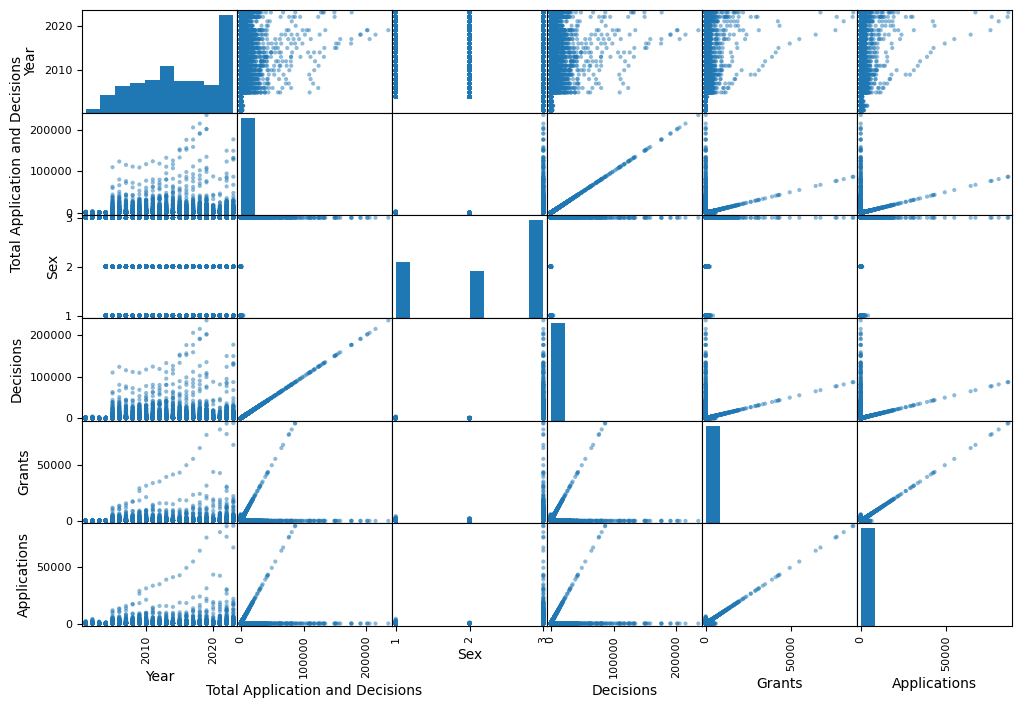

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["Year", "Total Application and Decisions", "Sex", "Decisions", "Grants", "Applications"]
scatter_matrix(model_df[attributes], figsize=(12, 8))
plt.show()

In [39]:
# This will convert categorical variables into a set of binary variables for each category
# Note: This can significantly increase the number of columns if you have high cardinality in your categorical variables
encoded_df = pd.get_dummies(model_df)

# Now, you can calculate the correlation matrix
corr_matrix_encoded = encoded_df.corr()


In [41]:
encoded_df.head()

,Year,Quarter,Sex,Decisions,Grants,Applications,Total Application and Decisions,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_American Samoa (United States),Nationality_Andorra,Nationality_Angola,Nationality_Anguilla (British),Nationality_Antigua and Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba (Dutch),Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,"Nationality_Bahamas, The",Nationality_Bahrain,Nationality_Bangladesh,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bermuda (British),Nationality_Bhutan,Nationality_Bolivia,Nationality_Bosnia and Herzegovina,Nationality_Botswana,Nationality_Brazil,Nationality_British overseas citizens,Nationality_Brunei,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cambodia,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde,Nationality_Cayman Islands (British),Nationality_Central African Republic,Nationality_Chad,Nationality_Chile,Nationality_China,Nationality_Christmas Island (Australian),Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Congo (Democratic Republic),Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba,Nationality_Curacao (Dutch),Nationality_Cyprus,Nationality_Cyprus (Northern part of),Nationality_Czechia,Nationality_Denmark,Nationality_Djibouti,Nationality_Dominica,Nationality_Dominican Republic,Nationality_East Timor,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Eswatini,Nationality_Ethiopia,Nationality_Faroe Islands,Nationality_Federated States of Micronesia,Nationality_Fiji,Nationality_Finland,Nationality_Former Yugoslavia,Nationality_France,Nationality_French Guiana (French),Nationality_French Southern & Antarctic Territories,Nationality_Gabon,"Nationality_Gambia, The",Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Gibraltar (British),Nationality_Greece,Nationality_Grenada,Nationality_Guadeloupe (French),Nationality_Guatemala,Nationality_Guinea,Nationality_Guinea-Bissau,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_India,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Ireland,Nationality_Israel,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Kiribati,Nationality_Kosovo,Nationality_Kuwait,Nationality_Kyrgyzstan,Nationality_Laos,Nationality_Latvia,Nationality_Lebanon,Nationality_Lesotho,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Macau,Nationality_Madagascar,Nationality_Malawi,Nationality_Malaysia,Nationality_Maldives,Nationality_Mali,Nationality_Malta,Nationality_Marshall Islands,Nationality_Martinique (French),Nationality_Mauritania,Nationality_Mauritius,Nationality_Mayotte (French),Nationality_Mexico,Nationality_Moldova,Nationality_Monaco,Nationality_Mongolia,Nationality_Montenegro,Nationality_Montserrat (British),Nationality_Morocco,Nationality_Mozambique,Nationality_Myanmar (Burma),Nationality_Namibia,Nationality_Nauru,Nationality_Nepal,Nationality_Netherlands,Nationality_Netherlands Antilles,Nationality_New Caledonia (French),Nationality_New Zealand,Nationality_Nicaragua,Nationality_Niger,Nationality_Nigeria,Nationality_Niue,Nationality_North Korea,Nationality_North Macedonia,Nationality_Northern Mariana Islands (United States),Nationality_Norway,Nationality_Occupied Palestinian Territories,Nationality_Oman,Nationality_Other and Unknown,Nationality_Other and unknown,Nationality_Pakistan,Nationality_Palau,Nationality_Panama,Nationality_Papua New Guinea,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Pitcairn Islands (British),Nationality_Poland,Na

In [42]:
corr_with_AD = corr_matrix_encoded["Case type_Refused"].sort_values(ascending=False)

print(corr_with_AD)


Case type_Refused             1.000000
Case outcome group_Refused    0.874574
Case outcome_Refused          0.874574
Age_30 to 49                  0.442057
Age_50 to 69                  0.236673
                                ...   
Age_Unknown                  -0.369887
Sex                          -0.382210
Case outcome group_Issued    -0.509842
Case type_Issued             -0.509842
Case outcome_Issued          -0.520376
Name: Case type_Refused, Length: 336, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming clean_df is already defined
numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit StandardScaler on the numeric columns
my_ss = StandardScaler()
X = my_ss.fit_transform(clean_df[numeric_cols])

# Create a DataFrame from the scaled data
clean_df_scaled = pd.DataFrame(data=X, columns=numeric_cols)

# Apply log transformation only to the numeric columns, adding 1 to avoid log(0)
log_transformed = np.log(clean_df[numeric_cols] + 1)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'OutcomeVariable' is what you're predicting, replace with your actual target column
X = model_df.drop('OutcomeVariable', axis=1)
y = model_df['OutcomeVariable']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
